In [53]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
# from tensorflow.keeras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# 예제1

#1. ImageDataGenerator 생성
gen = ImageDataGenerator(rotation_range=30, #0-30 사이 회전 
                         width_shift_range=0.3, # 이미지 이동
                         shear_range=0.4,
                         horizontal_flip=True)#좌우반전

In [7]:
# 이미지 로드 및 정규화

img_array_list=[]
img_names=['data/dog1.jpg','data/dog2.jpg','data/cat1.jpg','data/cat2.jpg']

for i in range(len(img_names)):
    loaded_img=load_img(img_names[i],target_size=(100,100))
    loaded_img_array=img_to_array(loaded_img)/255.0
    img_array_list.append(loaded_img_array)
    
img_array_list[0]

array([[[0.972549  , 0.9019608 , 0.85490197],
        [0.9764706 , 0.90588236, 0.85882354],
        [0.98039216, 0.9137255 , 0.8745098 ],
        ...,
        [0.9882353 , 0.9607843 , 0.9372549 ],
        [0.9843137 , 0.972549  , 0.9529412 ],
        [0.9843137 , 0.972549  , 0.9529412 ]],

       [[0.972549  , 0.9019608 , 0.85490197],
        [0.9764706 , 0.90588236, 0.85882354],
        [0.98039216, 0.9137255 , 0.8745098 ],
        ...,
        [0.98039216, 0.96862745, 0.9411765 ],
        [0.9843137 , 0.972549  , 0.9529412 ],
        [0.98039216, 0.96862745, 0.9490196 ]],

       [[0.9764706 , 0.90588236, 0.85882354],
        [0.9764706 , 0.90588236, 0.85882354],
        [0.9764706 , 0.9098039 , 0.87058824],
        ...,
        [0.98039216, 0.96862745, 0.9411765 ],
        [0.9764706 , 0.95686275, 0.93333334],
        [0.9764706 , 0.95686275, 0.93333334]],

       ...,

       [[0.9411765 , 0.9372549 , 0.92156863],
        [0.9411765 , 0.9372549 , 0.92156863],
        [0.9529412 , 0

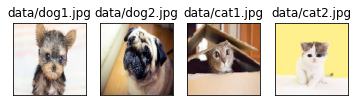

In [8]:
plt.figure(figsize=(6,6))
for i in range(len(img_array_list)):
    plt.subplot(1,len(img_array_list),i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(img_names[i])
    plt.imshow(img_array_list[i])

In [12]:
batch_size=2
data_gen = gen.flow(np.array(img_array_list),batch_size=batch_size)

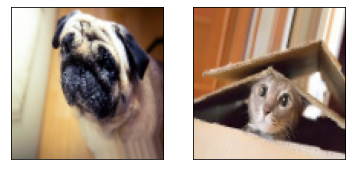

In [13]:
img=data_gen.next()

plt.figure(figsize=(6,6))
for i in range(len(img)):
    plt.subplot(1,len(img),i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i])

In [14]:

gen = ImageDataGenerator(rotation_range=30, #0-30 사이 회전 
                         width_shift_range=0.3, # 이미지 이동
                         shear_range=0.3,
                         rescale=1./255)

In [16]:
data_path = 'data/test_dir/'
batch_size = 5

data_gen = gen.flow_from_directory(directory=data_path,
                                   batch_size=batch_size,
                                   shuffle=True,
                                   target_size=(240,240),
                                   class_mode='categorical')

Found 12 images belonging to 4 classes.


In [45]:
print(data_gen[2][1][1])

[0. 1. 0. 0.]


In [48]:
img,label = data_gen.next()
print(len(img))
print(label)

5
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


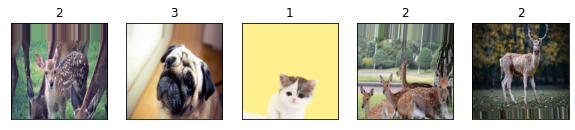

In [49]:
plt.figure(figsize=(10,10))
for i in range(len(img)):
    plt.subplot(1,len(img),i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(str(np.argmax(label[i])))
    plt.imshow(img[i])